In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv',index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
df['target'].value_counts()

white    4898
red      1599
Name: target, dtype: int64

In [10]:
df['target'] = df['target'].map({'white':0,'red':1})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
X = df.drop('target',axis=1)
y = df['target']

In [12]:
X.shape,y.shape

((6497, 12), (6497,))

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                 stratify=y,
                 shuffle=True,
                 random_state=2022,
                 test_size=0.2)
X_train.shape,X_test.shape

((5197, 12), (1300, 12))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values

In [16]:
X_train.shape,y_train.shape

((5197, 12), (5197,))

In [17]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(12,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=bce,
    metrics=['acc']
)

In [18]:
EPOCHS = 300
BATCH_SIZE = 32
history = model.fit(X_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 2s 5ms/step - loss: 0.1787 - acc: 0.9562 - val_loss: 0.0608 - val_acc: 0.9904
Epoch 2/300
130/130 [==============================] - 0s 3ms/step - loss: 0.0400 - acc: 0.9918 - val_loss: 0.0475 - val_acc: 0.9923
Epoch 3/300
130/130 [==============================] - 0s 4ms/step - loss: 0.0299 - acc: 0.9945 - val_loss: 0.0421 - val_acc: 0.9942
Epoch 4/300
130/130 [==============================] - 0s 3ms/step - loss: 0.0254 - acc: 0.9949 - val_loss: 0.0393 - val_acc: 0.9942
Epoch 5/300
130/130 [==============================] - 0s 4ms/step - loss: 0.0223 - acc: 0.9959 - val_loss: 0.0373 - val_acc: 0.9933
Epoch 6/300
130/130 [==============================] - 0s 3ms/step - loss: 0.0202 - acc: 0.9962 - val_loss: 0.0358 - val_acc: 0.9942
Epoch 7/300
130/130 [==============================] - 0s 3ms/step - loss: 0.0183 - acc: 0.9966 - val_loss: 0.0348 - val_acc: 0.9942
Epoch 8/300
130/130 [==============================] - 0s 3ms/step - loss: 0.0166

In [19]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

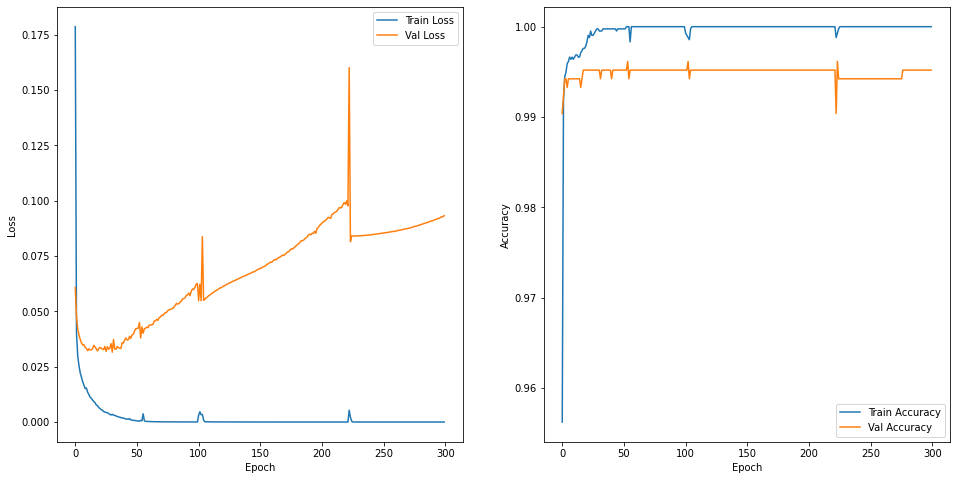

In [20]:
plot_history(history)

In [21]:
# 평가
model.evaluate(X_train, y_train)

163/163 [==============================] - 1s 3ms/step - loss: 0.0187 - acc: 0.9990


[0.018669115379452705, 0.9990379214286804]

In [22]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [23]:
model.evaluate(X_test_s,y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - acc: 0.9977


[0.005621213000267744, 0.9976922869682312]

In [31]:
y_pred = model.predict(X_test_s)
y_pred

41/41 [==============================] - 0s 2ms/step


array([[4.5729830e-20],
       [1.8862047e-16],
       [8.8677681e-29],
       ...,
       [2.2365225e-26],
       [1.3588456e-25],
       [1.9097283e-23]], dtype=float32)

In [33]:
y_pred = y_pred.flatten()
y_pred = (y_pred>0.5).astype('int')
y_pred

array([0, 0, 0, ..., 0, 0, 0])

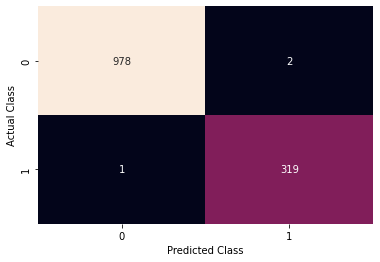

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False,fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()